In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def build_lstm_model(input_shape, num_classes):
    """
    Xây dựng mô hình LSTM cho bài toán phân loại.

    Args:
        input_shape (tuple): Kích thước đầu vào (num_frames, num_landmarks * num_coordinates).
        num_classes (int): Số lượng nhãn cần dự đoán.

    Returns:
        model: Mô hình LSTM.
    """
    model = Sequential()

    # Lớp masking để bỏ qua các giá trị padding (nếu có)
    model.add(Masking(mask_value=0., input_shape=input_shape))

    # LSTM layer 1
    model.add(LSTM(128, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))  # Dropout để giảm overfitting

    # LSTM layer 2
    model.add(LSTM(64, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.2))

    # Dense layer cho classification
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Softmax cho phân loại

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [14]:
num_samples, num_frames, num_landmarks, num_coordinates = padded_sequences.shape
X = padded_sequences.reshape(num_samples, num_frames, num_landmarks * num_coordinates)

y = to_categorical(labels, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (156, 100, 1503), y_train shape: (156, 13)
X_test shape: (39, 100, 1503), y_test shape: (39, 13)


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint


input_shape = (num_frames, num_landmarks * num_coordinates)
model = build_lstm_model(input_shape, 13)

checkpoint = ModelCheckpoint(
    filepath="best_lstm_model.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    callbacks=[checkpoint]
)

model.save("lstm_model_v2.h5")


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.0640 - loss: 2.5792
Epoch 1: val_loss improved from inf to 2.60914, saving model to best_lstm_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.0608 - loss: 2.5808 - val_accuracy: 0.0256 - val_loss: 2.6091
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.0881 - loss: 2.5686
Epoch 2: val_loss did not improve from 2.60914
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.0853 - loss: 2.5694 - val_accuracy: 0.0256 - val_loss: 2.6510
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.0699 - loss: 2.5713
Epoch 3: val_loss did not improve from 2.60914
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.0717 - loss: 2.5714 - val_accuracy: 0.0256 - val_loss: 2.6672
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.1128 - loss: 2.5652
Epoch 4: val_loss did not improve from 2.60914
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.1086 - loss: 2.5670 - val_accuracy:

In [11]:
# Đánh giá trên tập test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0928, Test Accuracy: 1.0000


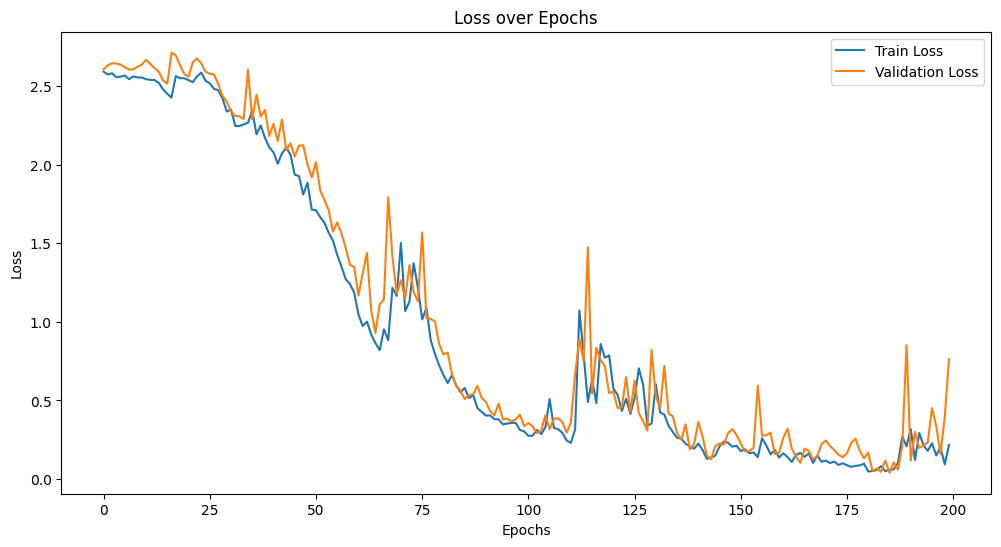

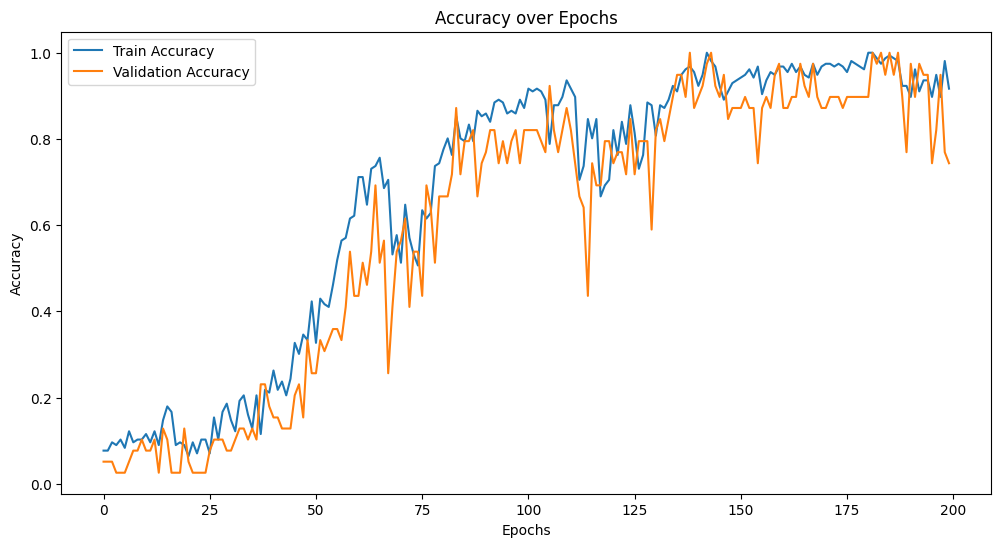

In [8]:
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
